In [1]:
pip install ultralytics


  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/914.9 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 914.9/914.9 kB 2.8 MB/s eta 0:00:00
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.9 MB 5.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/12.9

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.




0: 384x640 2 cars, 257.3ms
Speed: 4.8ms preprocess, 257.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Processed vid_4_17360.jpg and saved to training_images_output

0: 384x640 1 person, 301.7ms
Speed: 9.8ms preprocess, 301.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Processed vid_4_7360.jpg and saved to training_images_output

0: 384x640 (no detections), 306.7ms
Speed: 6.7ms preprocess, 306.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Processed vid_4_9160.jpg and saved to training_images_output

0: 384x640 1 car, 299.4ms
Speed: 8.9ms preprocess, 299.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Processed vid_4_16640.jpg and saved to training_images_output

0: 384x640 (no detections), 290.6ms
Speed: 7.5ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Processed vid_4_29680.jpg and saved to training_images_output

0: 384x640 (no detections), 291.0ms
Speed:

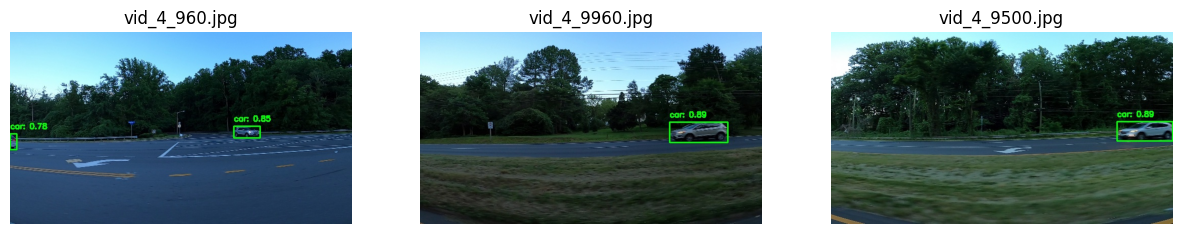

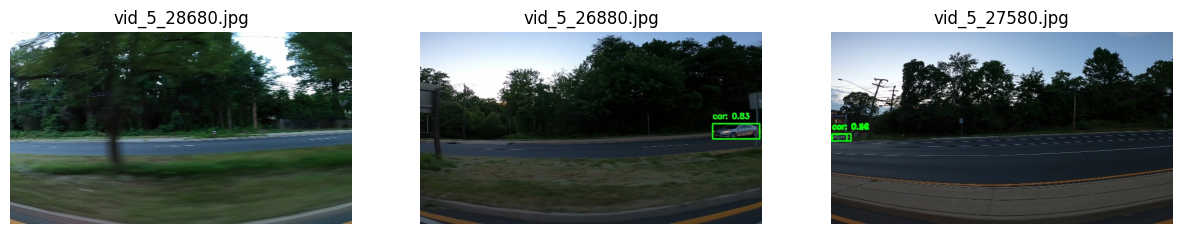

In [9]:
import cv2
import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt

random.seed(42)
model = YOLO("yolov5s.pt")  

def detect_objects_in_images(input_folder, output_folder, display=False, fraction=0.15):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # List image files (supporting common image formats)
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Work on only the given fraction (15%) of the images
    num_images_to_process = max(1, int(len(image_files) * fraction))
    
    # Randomly select 15% of the images
    selected_images = random.sample(image_files, num_images_to_process)
    
    for img_file in selected_images:
        img_path = os.path.join(input_folder, img_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Could not read image {img_path}")
            continue
        
        # Step 3: Perform object detection on the image
        results = model(img)
        
        # Process each detection result for the image
        for prediction in results:
            for box in prediction.boxes:
                # Extract bounding box coordinates
                coords = box.xyxy[0].cpu().numpy() if hasattr(box.xyxy[0], 'cpu') else box.xyxy[0]
                x1, y1, x2, y2 = map(int, coords)
                conf = float(box.conf[0])
                cls = int(box.cls[0])
                label = model.names[cls]
                
                # Draw bounding box and label on the image
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, f"{label}: {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        # Save the processed image
        output_path = os.path.join(output_folder, img_file)
        cv2.imwrite(output_path, img)
        print(f"Processed {img_file} and saved to {output_folder}")
        
        # Optionally display the image
        if display:
            cv2.imshow("YOLO Detection", img)
            cv2.waitKey(500)  # Display each image for 500ms
            
    cv2.destroyAllWindows()


input_folder_train = "training_images"           
output_folder_train = "training_images_output"  

input_folder_test = "testing_images"              
output_folder_test = "testing_images_output"      


detect_objects_in_images(input_folder_train, output_folder_train, display=True, fraction=0.15)
detect_objects_in_images(input_folder_test, output_folder_test, display=True, fraction=0.15)


def display_sample_output(output_folder, num_samples=3):
    image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files[:num_samples]):
        img_path = os.path.join(output_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(img_file)
        plt.axis("off")
    plt.show()

display_sample_output(output_folder_train)
display_sample_output(output_folder_test)



0: 384x640 (no detections), 379.7ms
Speed: 14.2ms preprocess, 379.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
vid_4_960.jpg: 0 detections

0: 384x640 1 car, 195.5ms
Speed: 3.9ms preprocess, 195.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
vid_4_9960.jpg: 1 detections

0: 384x640 1 car, 243.3ms
Speed: 3.8ms preprocess, 243.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
vid_4_9500.jpg: 1 detections

0: 384x640 (no detections), 315.7ms
Speed: 4.3ms preprocess, 315.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
vid_4_980.jpg: 0 detections

0: 384x640 2 trucks, 245.6ms
Speed: 6.4ms preprocess, 245.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
vid_4_9780.jpg: 2 detections

0: 384x640 1 car, 242.3ms
Speed: 4.6ms preprocess, 242.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
vid_4_9760.jpg: 1 detections

0: 384x640 2 persons, 304.1ms
Speed: 4.1ms preprocess

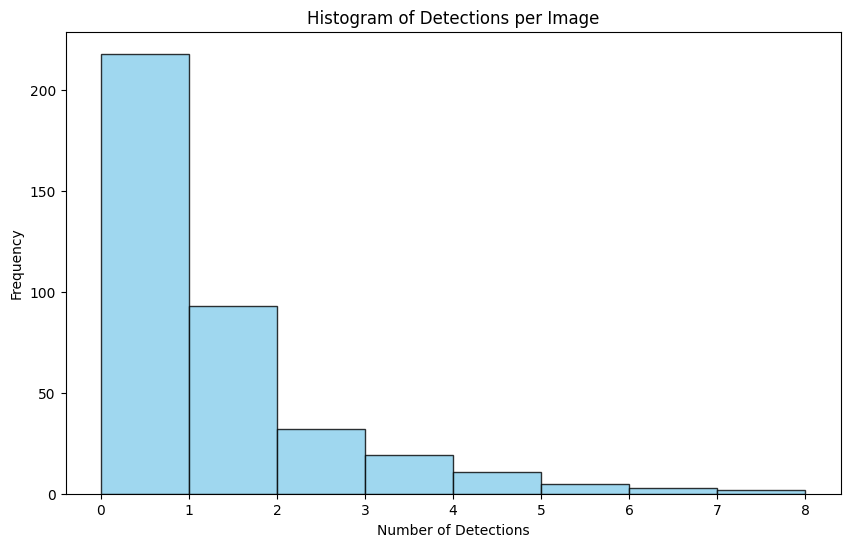

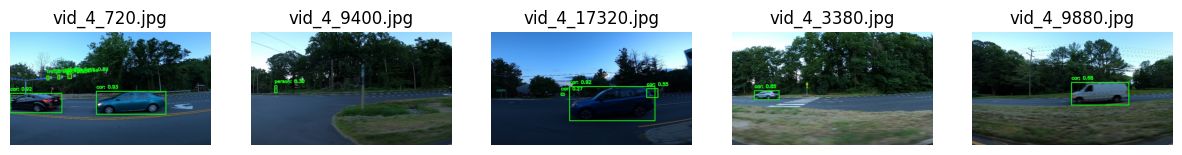


0: 384x640 (no detections), 242.3ms
Speed: 4.4ms preprocess, 242.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
vid_5_28680.jpg: 0 detections

0: 384x640 1 car, 256.1ms
Speed: 6.1ms preprocess, 256.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
vid_5_26880.jpg: 1 detections

0: 384x640 (no detections), 255.4ms
Speed: 6.0ms preprocess, 255.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
vid_5_27580.jpg: 0 detections

0: 384x640 5 traffic lights, 250.2ms
Speed: 6.0ms preprocess, 250.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
vid_5_27360.jpg: 5 detections

0: 384x640 (no detections), 237.5ms
Speed: 5.7ms preprocess, 237.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
vid_5_29400.jpg: 0 detections

0: 384x640 (no detections), 229.6ms
Speed: 4.1ms preprocess, 229.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
vid_5_29440.jpg: 0 detections

0: 384x640 (no det

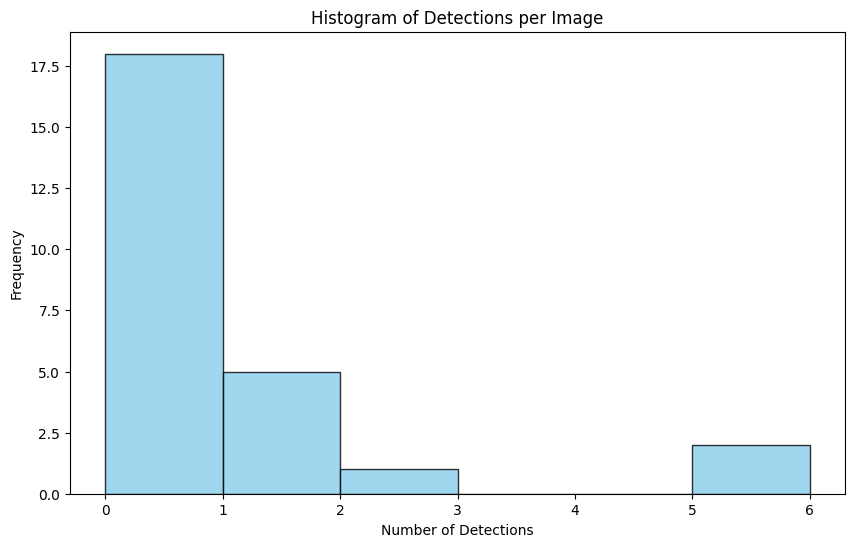

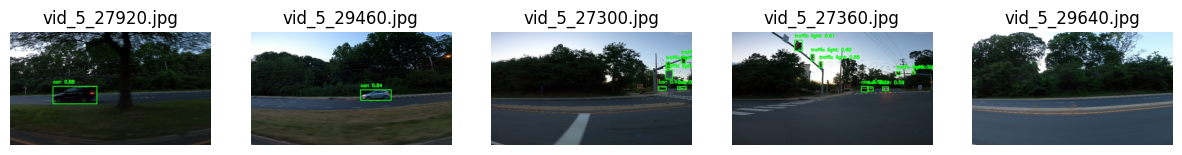

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def analyze_detection_performance(output_folder):
    image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    detection_counts = []

    # Re-run detection on each image to count detections (assuming 'model' is already defined)
    for img_file in image_files:
        img_path = os.path.join(output_folder, img_file)
        img = cv2.imread(img_path)
        results = model(img)  # Using the pre-loaded YOLO model
        count = 0
        for prediction in results:
            count += len(prediction.boxes)
        detection_counts.append(count)
        print(f"{img_file}: {count} detections")

    # Plot histogram of detections per image
    plt.figure(figsize=(10, 6))
    bins = range(min(detection_counts), max(detection_counts) + 2)
    plt.hist(detection_counts, bins=bins, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title("Histogram of Detections per Image")
    plt.xlabel("Number of Detections")
    plt.ylabel("Frequency")
    plt.show()

    # Display a montage of sample output images
    num_samples = 5
    sample_images = np.random.choice(image_files, size=min(num_samples, len(image_files)), replace=False)
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(output_folder, img_file)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(img_file)
        plt.axis("off")
    plt.show()

# Analyze detection performance for both training and testing output folders
analyze_detection_performance("training_images_output")
analyze_detection_performance("testing_images_output")
